# 基于词权-隐含狄利克雷分布的招聘主题挖掘
>#### 意义：随着互联网大数据时代的来临，网络招聘数据呈爆炸式增长，这类数据因为数据量巨大而难以被直接使用。而招聘主题挖掘技术能从复杂的数据中识别出招聘单位的需求，通过词权的方式对文本关键字进行提取，并利用主题模型对主题进行聚类，以达到提炼需求的目的。本文对招聘主题挖掘进行了问题描述和任务框架梳理，通过智联招聘信息采集、文本预处理、主题挖掘算法和主题建模四个方面进行主题挖掘，详细阐述了招聘主题挖掘技术的基本特征和典型方法，进行了对比分析，对当前招聘主题挖掘存在的问题及其发展趋势进行了分析与讨论。
>#### 主题挖掘作用：用于主题发现与热点分析，主题挖掘任务的本质是将输入的文本流划分到不同的主题类中，并且在必要时候建立新的主题类。
##### 参考文献：[1]陈迪,代艳君,王志锋.论坛主题挖掘研究综述[J].计算机工程与应用,2017,53(16):36-44.

### 数据采集
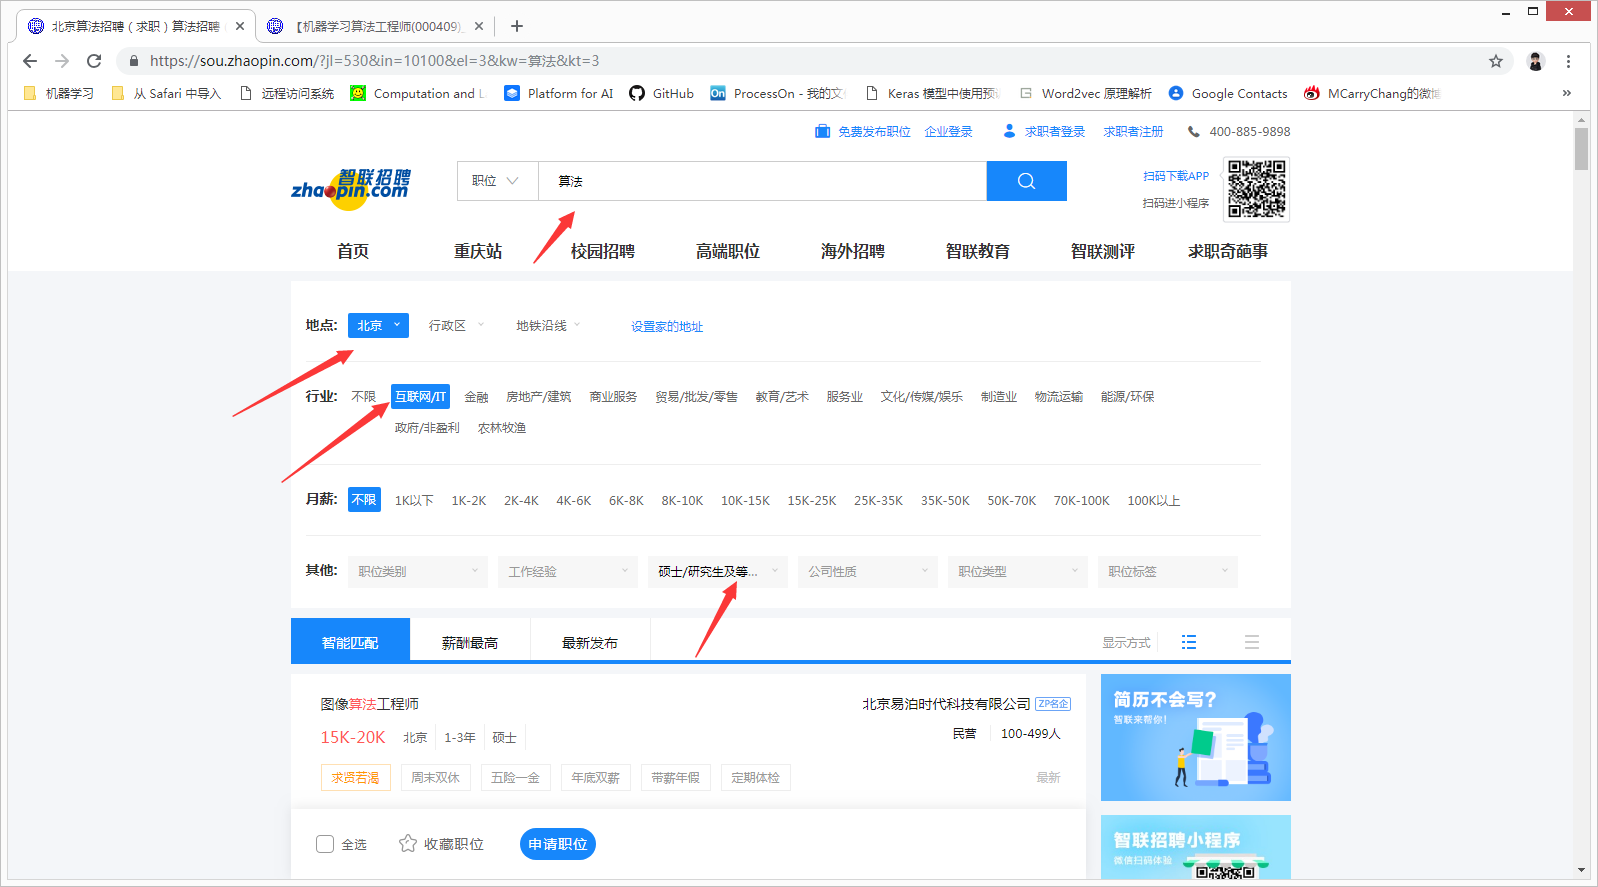

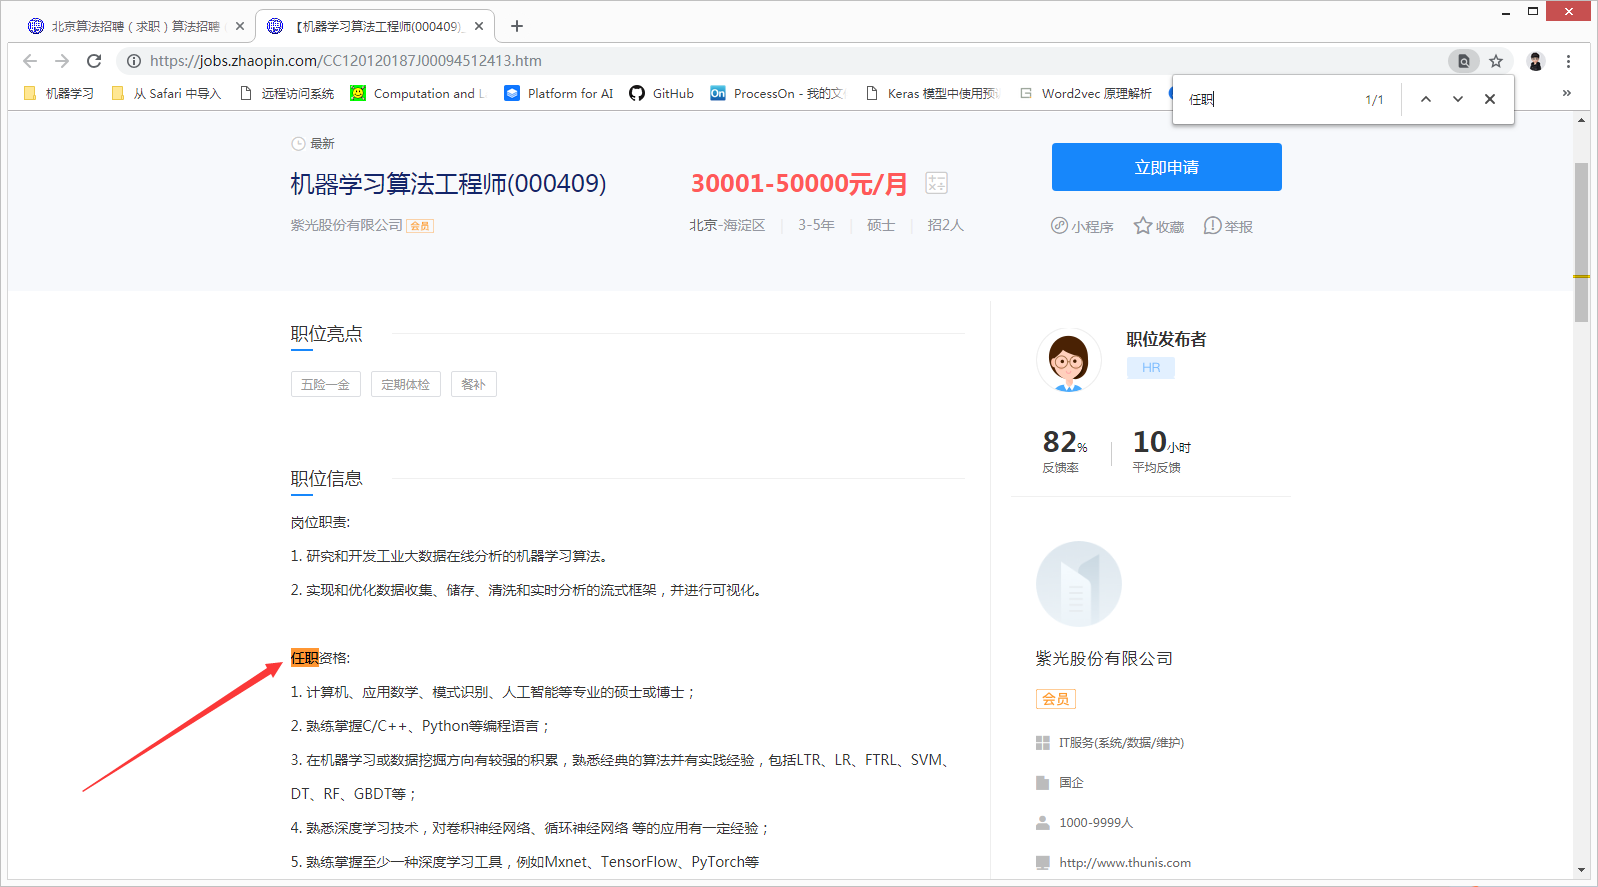

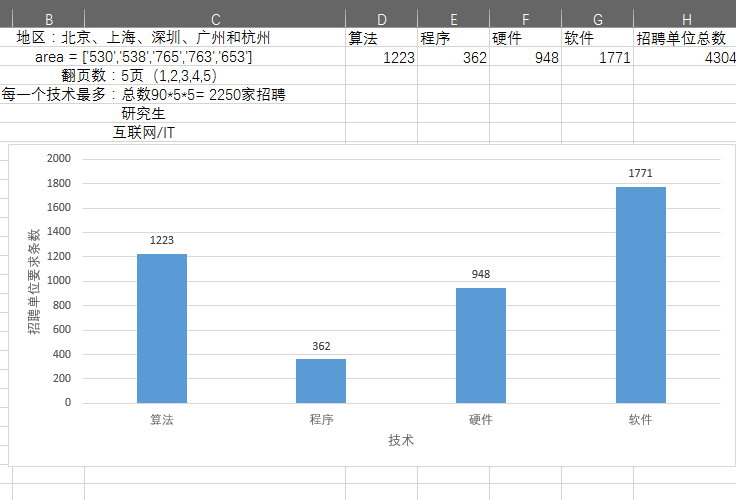

## 主题提取流程
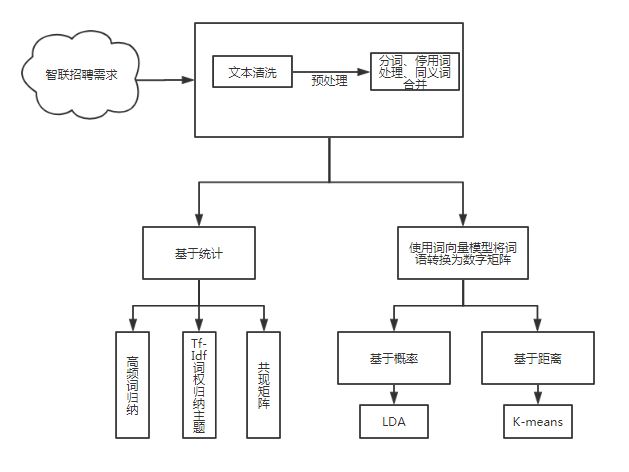

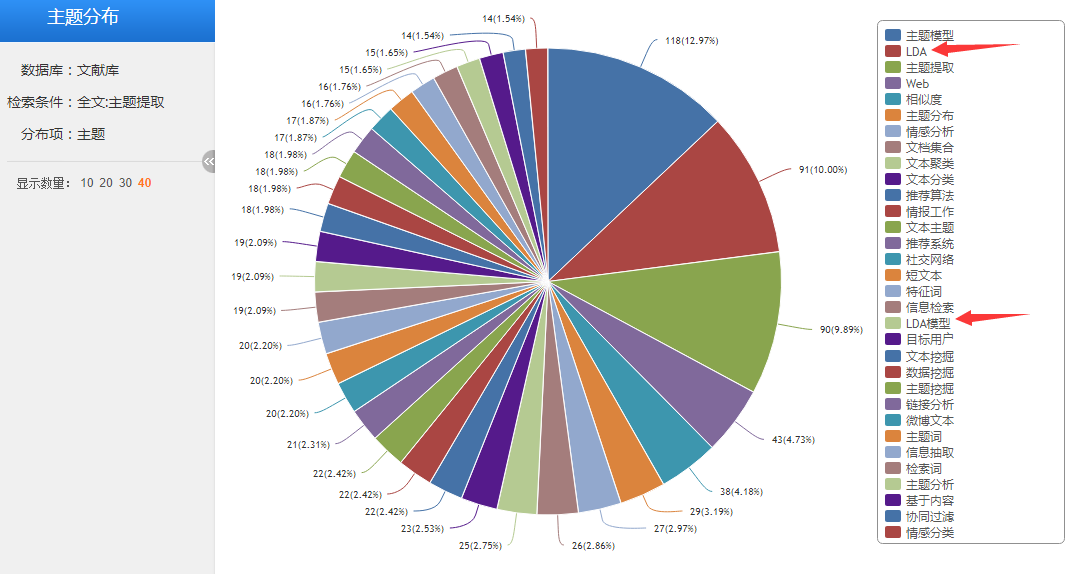

## TF-DF词向量模型
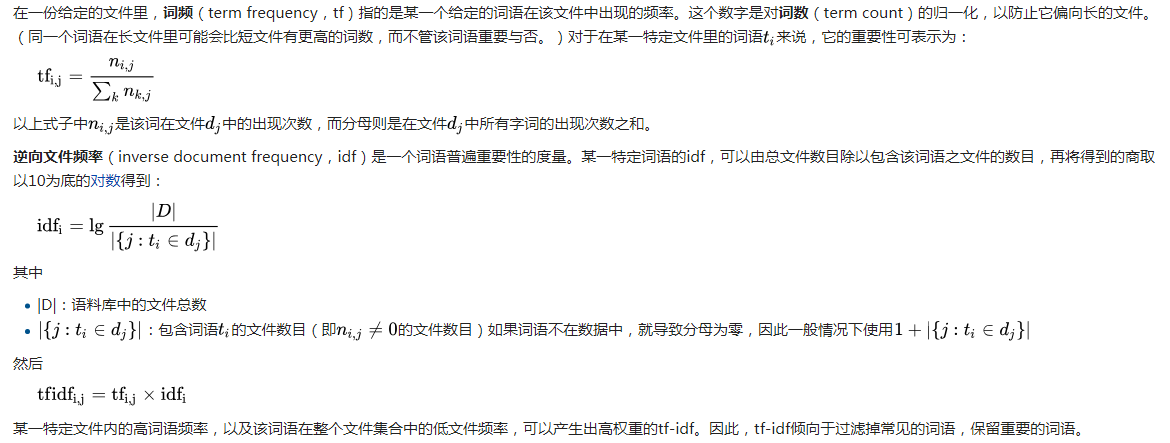

### TF-DF向量化
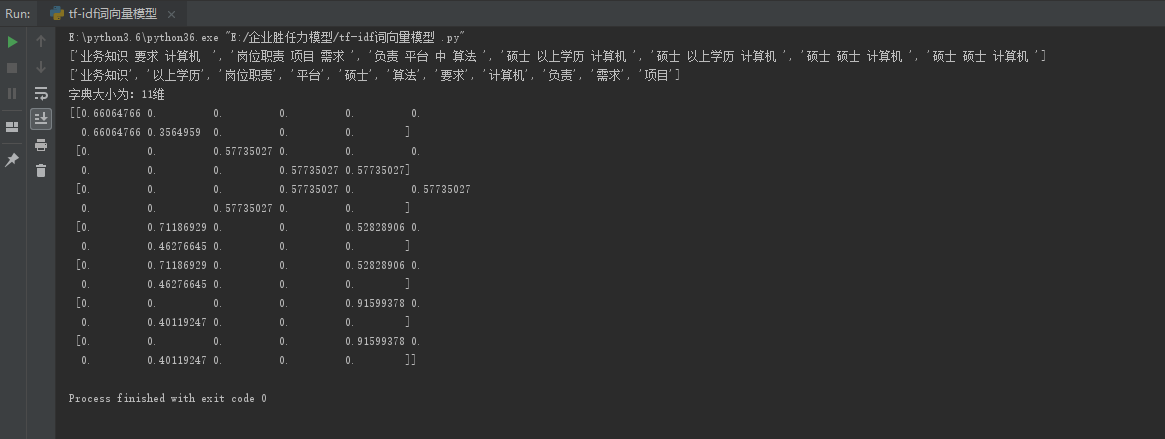

## 基于概率的隐含狄利克雷分布主题模型（Latent Dirichlet Allocation，简称LDA）是一种文档主题生成模型，也称为一个三层贝叶斯概率模型，包含词、主题和文档三层结构。一篇文章的每个词都是通过“以一定概率选择了某个主题，并从这个主题中以一定概率选择某个词语”这样一个过程得到。
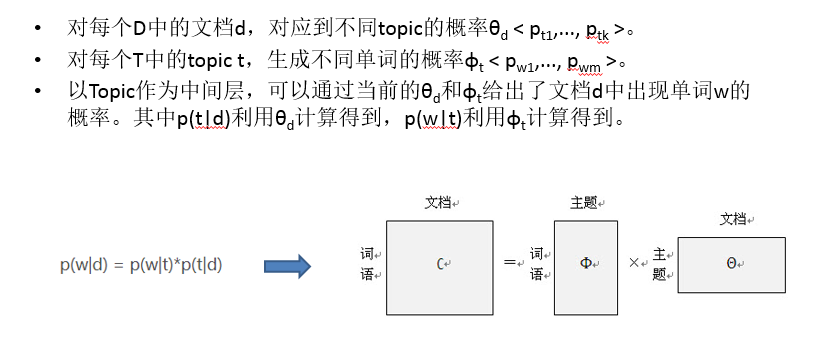

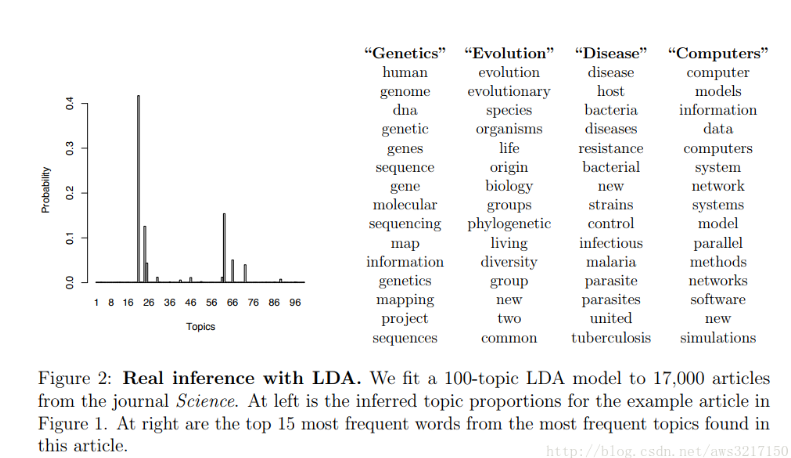

## LDA提取流程
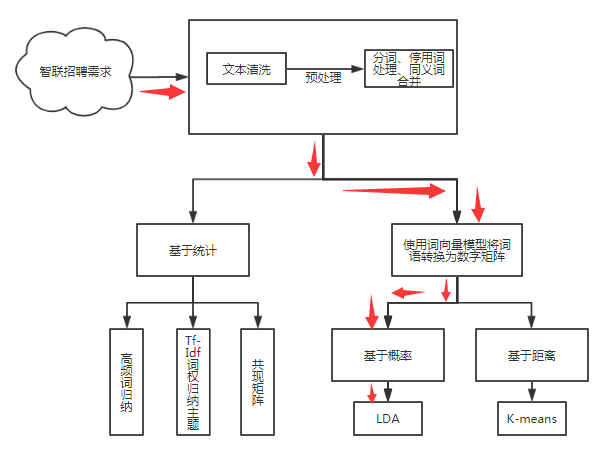

##  基于词频(Term Frequency，简称TF)、基于词权(Term Frequency–Inverse Document Frequency，简称TF-IDF)和词共现TextRank
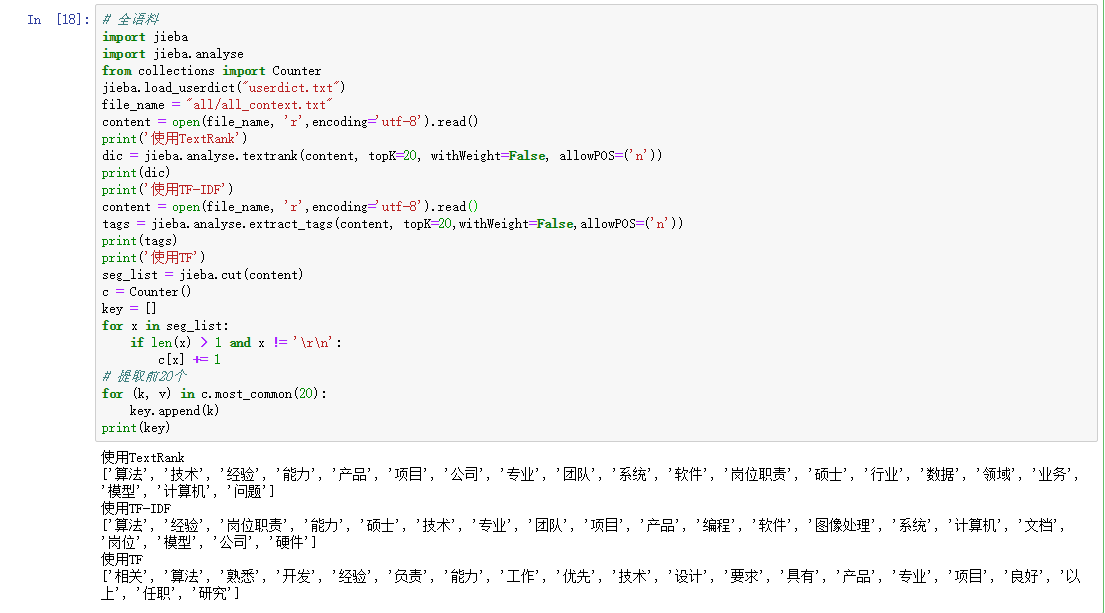

# TF-DF词向量下的LDA 可视化的主题聚类实验
#### 任务：除求职者必须具备的专业素养和实践能力外的职业胜任力要素的提取
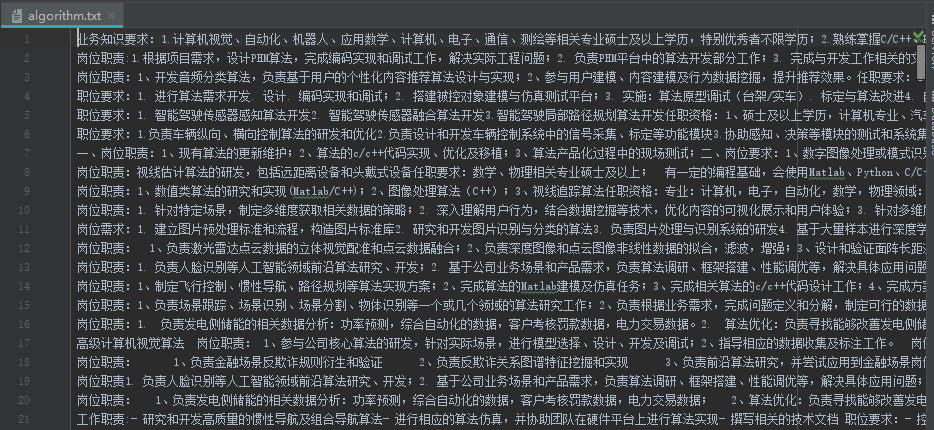

## 流程
 >1. **加载文本**
 ***
 >2. **训练模型 :** 
 <br>
 &#160;2.1、TF-IDF词向量化模型 
 <br>
 &#160;2.2、LDA主题聚类模型
 ***
 >3. **主题可视化**
  ***
 >4. **实验总结**


## 1、加载文本

#### 专业领域词典扩充
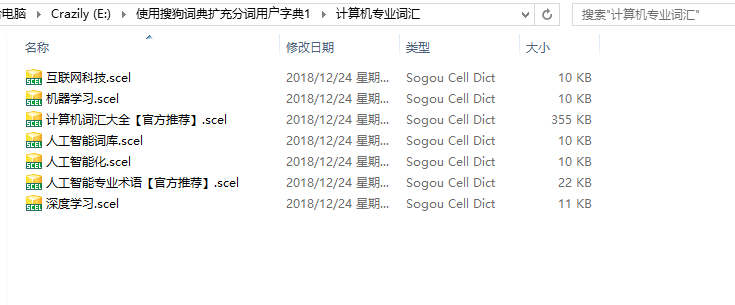

#### 建立领域字典
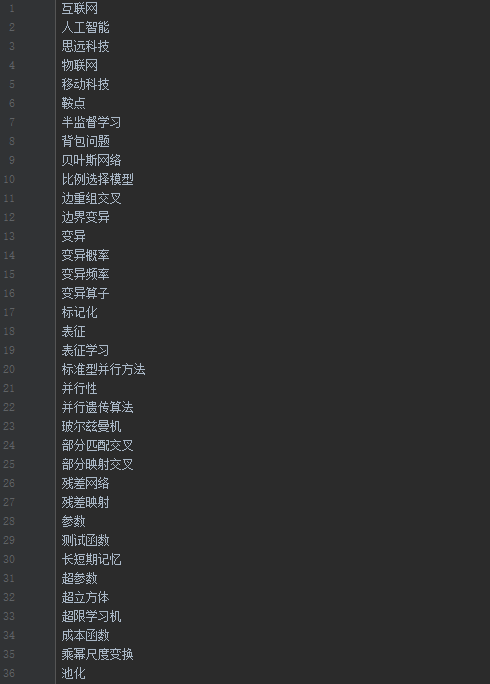

In [132]:
# 读取文件
import jieba
# 加载自定义分词词典
jieba.load_userdict("userdict.txt")  
jieba.setLogLevel(20)
X_train = []
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords
# 对句子进行分词
def seg_sentence(sentence):
    sentence_seged = ' '.join(jieba.cut(sentence,cut_all=False,HMM=True))
    return sentence_seged
for data in open('all/all_context.txt','r',encoding='utf-8').readlines():
# for data in open('demo.txt','r',encoding='utf-8').readlines():
    X_train.append(seg_sentence(data))
# 打印第一句分词后的招聘需求
print(X_train[0])
# 打印行
print(len(X_train))

业务知识 要求 ： 1 . 计算机视觉 、 自动化 、 机器人 、 应用数学 、 计算机 、 电子 、 通信 、 测绘 等 相关 专业硕士 及 以上学历 ， 特别 优秀者 不限学历 ； 2 . 熟练掌握 C / C++ 、 Python ， 有 Linux 和 ROS 编程 开发 经验 优先 ； 3 . 具有 扎实 的 数学 基础 ， 如 线性代数 、 概率论 、 微积分 等 ； 4 . 熟悉 惯性 组合 导航 算法 ， 熟悉 惯性传感器 （ IMU ） 与 其他 传感器 （ 相机 等 ） 的 融合 方法 ； 5 . 熟悉 激光雷达 或是 视觉 测距 、 避障 ， 进行 SLAM 定位 和 地图 构建 ； 5 . 熟悉 VisualSLAM 相关 算法 ， 对 滤波 以及 非线性 优化 有 深入 理解 ， 会 使 g2o 等 常见 优化 库 ； 6 . 研究 使用 过 ORB 、 ROVIO 、 OKVIS 等 开源 框架 ， 有 精细 解读 过 源码 优先 。 

4304


## 2、训练模型

In [133]:
# 2.1 训练词向量模型
from sklearn.feature_extraction.text import TfidfVectorizer
#使用tf-idf词向量模型
n_features = 8000
# 不过滤单个词
vectorizer = TfidfVectorizer(max_features=n_features,token_pattern='(?u)\\b\\w+\\b')
# 开始训练词向量模型
vectorizer.fit_transform(X_train)
# 保存词向量模型
from sklearn.externals import joblib
joblib.dump(vectorizer,'model/tf-idf-lda_vectorizer')
# 加载模型
from sklearn.externals import joblib
tf_vectorizer = joblib.load('model/tf-idf-lda_vectorizer')
tf = tf_vectorizer.fit_transform(X_train)
print(tf.toarray())
print(tf.shape)
print(tf.toarray()[0])
print(len(tf.toarray()[0]))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4304, 8000)
[0. 0. 0. ... 0. 0. 0.]
8000


In [136]:
# 2.2 训练LDA主题聚类模型
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 4)  
# LDA模型训练
lda.fit(tf)
# 主题相关的top词计算
def print_top_words(model, feature_names, n_top_words):  
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 10)

e:\python3.6\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topic #0:
员工 福利 补贴 我们 带薪 五险 一金 你 您 法定
Topic #1:
储能 轨道交通 脉冲 变流器 信号系统 药品 党建 光伏 发电 逆变器
Topic #2:
and in of to with the design or for experience
Topic #3:
的 和 算法 等 有 相关 2 1 熟悉 开发


## 3、主题可视化

In [137]:
# 加载可视化模块
import pyLDAvis.sklearn
data = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.show(data) 


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [27/Dec/2018 12:39:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2018 12:39:01] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2018 12:39:01] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [27/Dec/2018 12:39:01] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


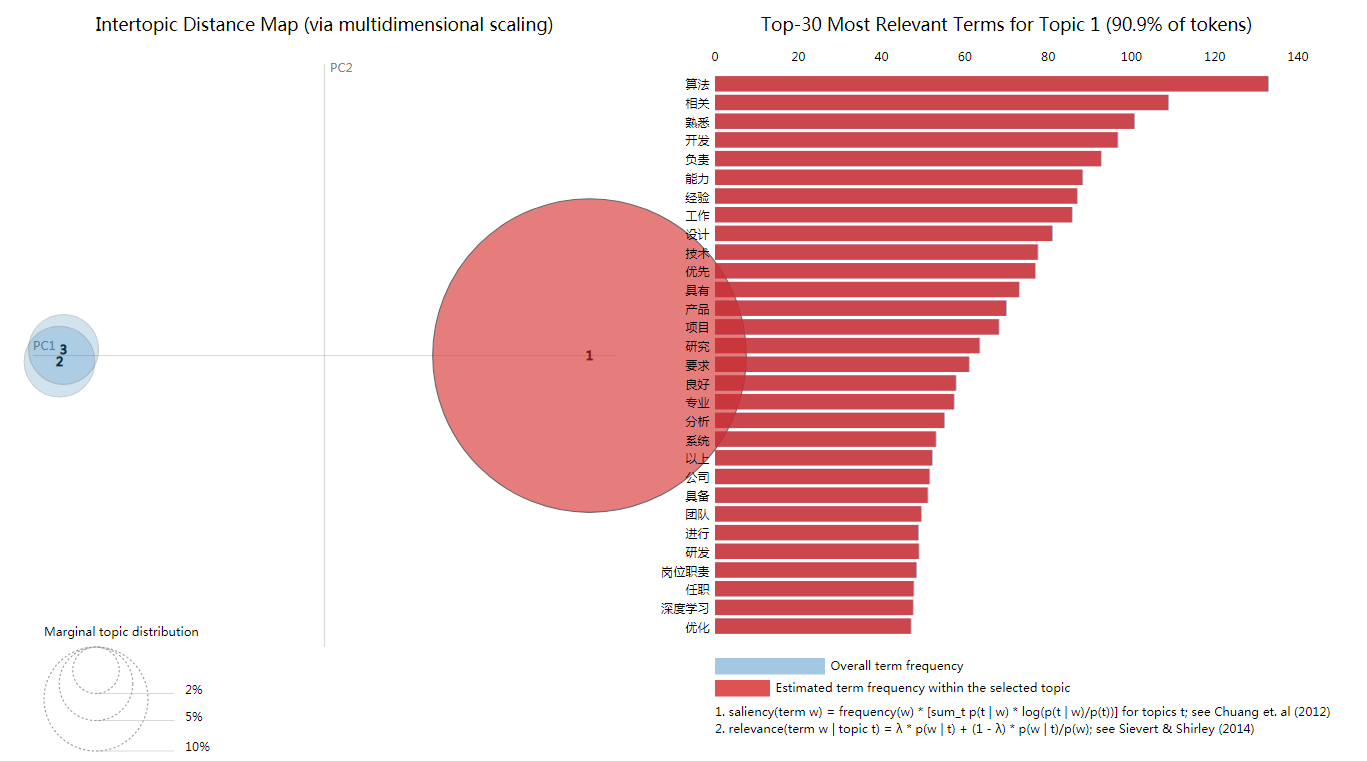

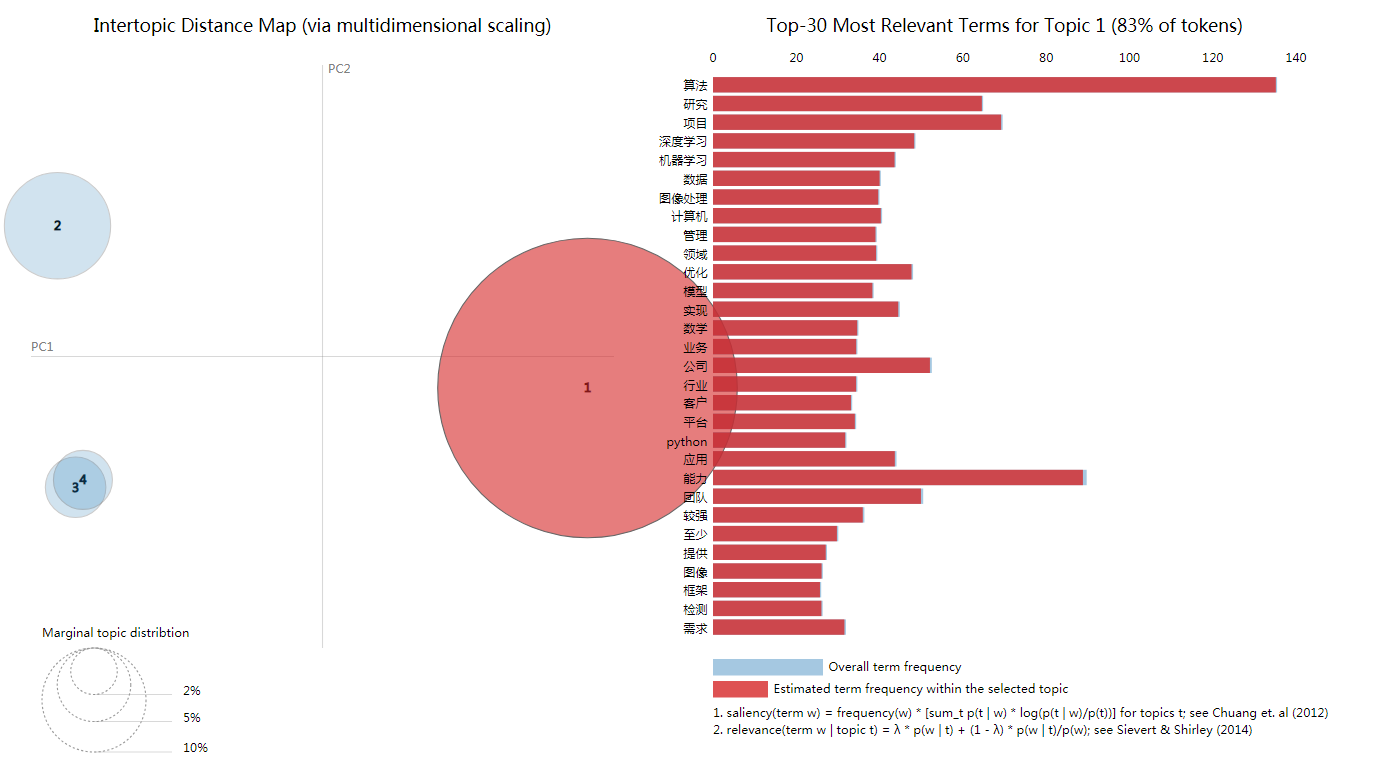

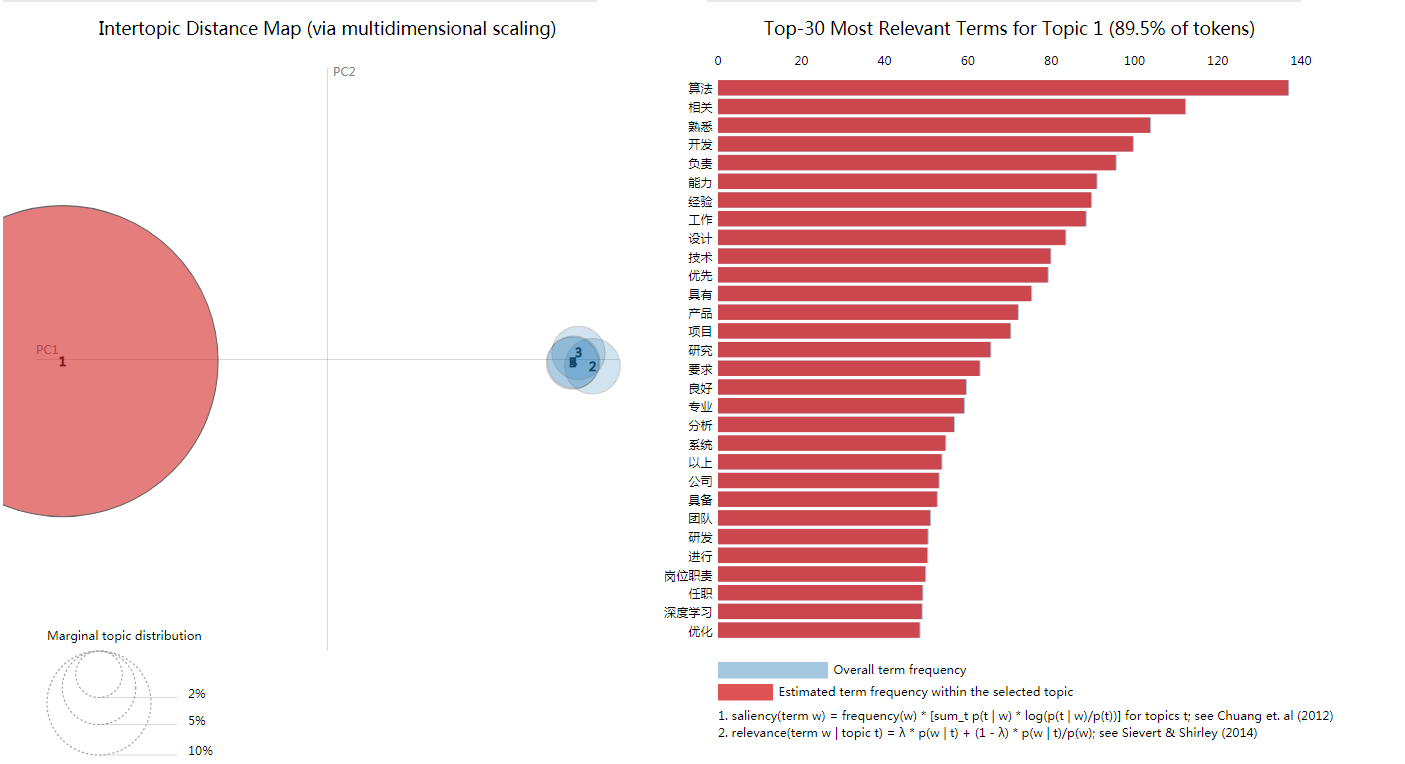

## 4、实验总结
### 通过总结这些主题相关的词汇表达的意义，我们可以归纳出该主题的意义。
### 每个主题出现的频率用圆圈的大小来表示，以此表示主题的重要性。
### 将主题分布到两个维度上，主题相互之间的位置远近，就表达了主题之间的相似度。
### LDA的主题数可以通过可视化确定，或者是通过计算主题相似度来迭代得出最优主题数。

## 基于距离（K-means）
#### 通过最小化平方误差得出全局最优主题数
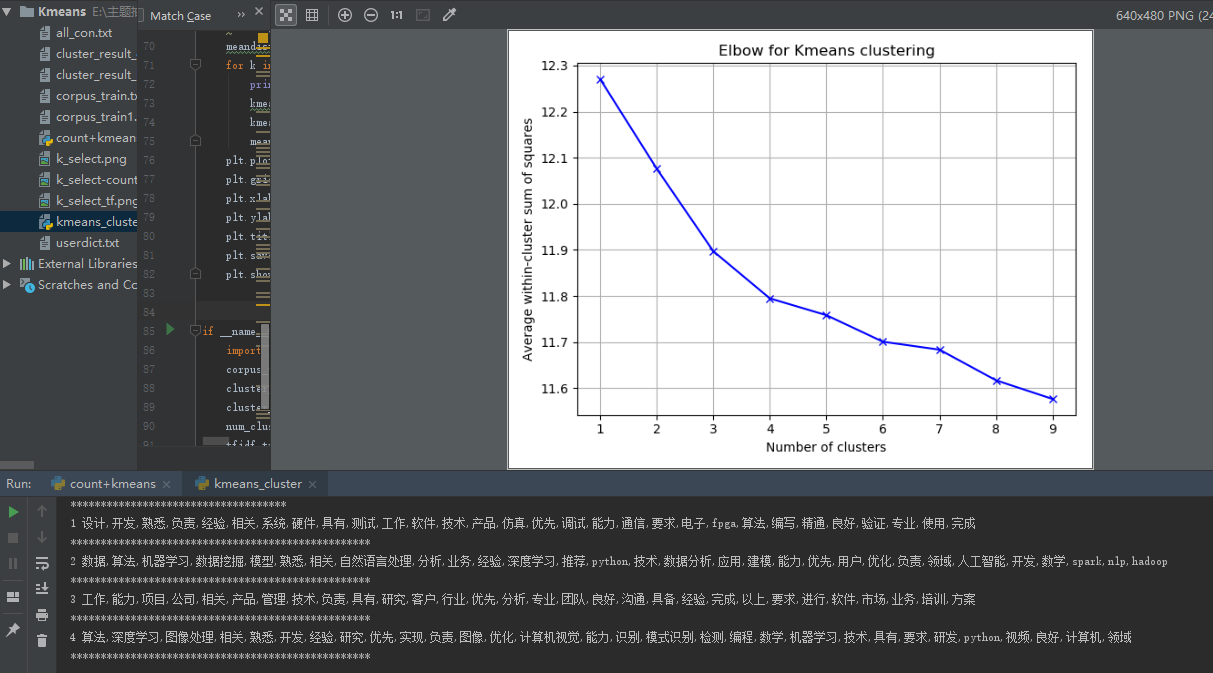

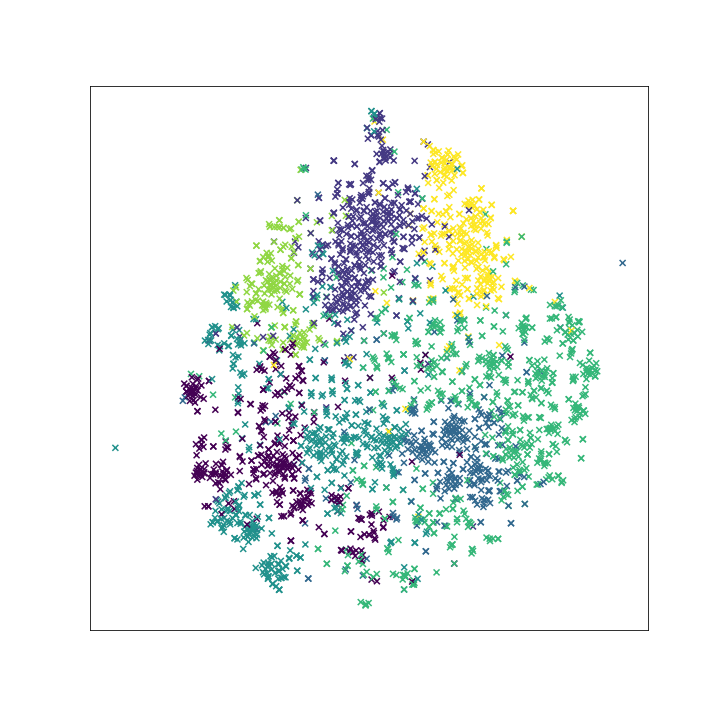

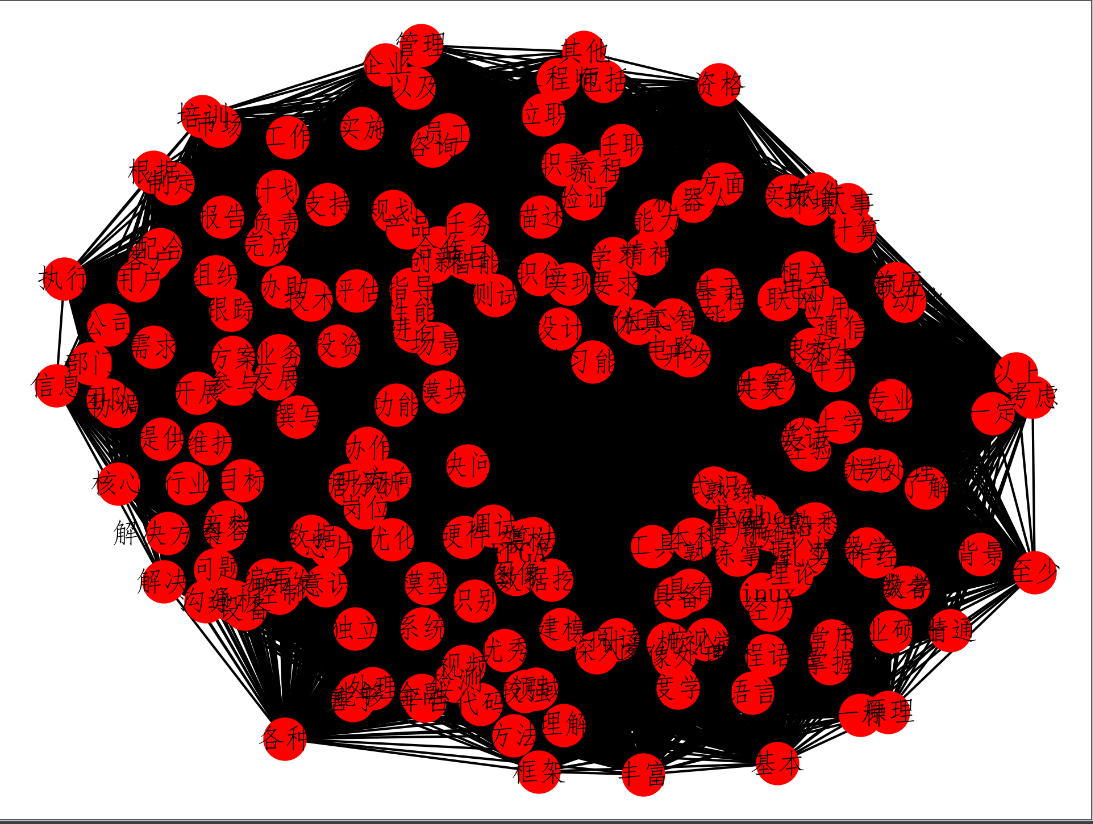